In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pingouin as pg

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.outliers_influence as sms
from statsmodels.tools.tools import add_constant

from patsy.contrasts import ContrastMatrix
from patsy.contrasts import Poly
%matplotlib inline

In [3]:
data = pd.read_csv('../Data_Files/Soya.dat', sep='\t')
data.head()

,Soya,Sperm
0,No Soya Meals,0.35
1,No Soya Meals,0.58
2,No Soya Meals,0.88
3,No Soya Meals,0.92
4,No Soya Meals,1.22


In [4]:
data.groupby('Soya')['Sperm'].describe()

,count,mean,std,min,25%,50%,75%,max
Soya,,,,,,,,
1 Soya Meal Per Week,20.0,4.6060,4.672586,0.33,1.3400,2.595,7.1250,18.47
4 Soyal Meals Per Week,20.0,4.1105,4.410078,0.40,1.3400,2.945,4.7075,18.21
7 Soya Meals Per Week,20.0,1.6535,1.108989,0.31,0.7850,1.335,2.7125,4.11
No Soya Meals,20.0,4.9870,5.084488,0.35,1.4375,3.095,7.6300,21.08


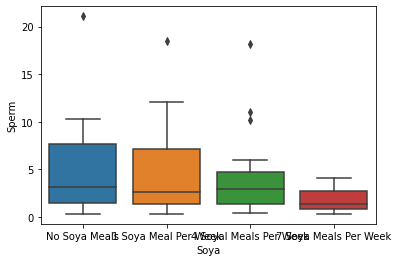

In [5]:
_ = sns.boxplot(x='Soya', y='Sperm', data=data)

In [21]:
data_0 = data[data['Soya']=='No Soya Meals']
data_1 = data[data['Soya']=='1 Soya Meal Per Week']
data_4 = data[data['Soya']=='4 Soyal Meals Per Week']
data_7 = data[data['Soya']=='7 Soya Meals Per Week']

In [22]:
stat, p = st.levene(data_0['Sperm'], data_1['Sperm'], data_4['Sperm'], data_7['Sperm'])
print(stat, p)

2.8605966363770716 0.04236514183199408


#### # Assumption of homogeneity of variances is violated. Clear from boxplots and levene tests.


In [23]:
st.shapiro(data['Sperm'])

(0.7485488057136536, 2.173252688919547e-10)

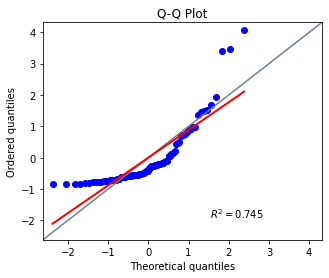

In [24]:
_ = pg.qqplot(data['Sperm'], confidence=False)

#### # normality assumption is also violated.

## Doing Normal Anova

In [25]:
m01 = ols('Sperm~C(Soya)', data=data).fit()
m01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sperm   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.635
Date:                Wed, 28 Oct 2020   Prob (F-statistic):             0.0558
Time:                        13:52:57   Log-Likelihood:                -225.01
No. Observations:                  80   AIC:                             458.0
Df Residuals:                      76   BIC:                             467.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             4.6060      0.924      4.983      0.000       2.765       6.447
C(Soya)[T.4 Soyal Meals Per Week]    -0.4955      1.307     -0.379      0.706      -3.099       2.108
C(Soya)[T.7 Soya Meals Per Week]     -2.9525      1.307     -2.258      0.027      -5.556      -0.349
C(Soya)[T.No Soya Meals]              0.3810      1.307      0.291      0.772      -2.223       2.985
==============================================================================
Omnibus:                       43.835   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.530
Skew:                           1.904   Prob(JB):                     1.35e-25
Kurtosis:                       7.457   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### When doing normal anova it seems that the test is not significant at p=0.05

#### # The main ANOVA summary table shows us that because the observed significance value is greater than .05 we can say that there was no significant effect of soya intake on men’s sperm count. This is strange  coz , the Kruskal–Wallis test produced a significant result! The reason for this difference is that the data violate the assumptions of normality and homogeneity of variance. As I mention in non-parametric tests chapter, although parametric tests have more power to detect effects when their assumptions are met, when their assumptions are violated non-parametric tests have more power! This example was arranged to prove this point: because the parametric assumptions are violated, the non-parametric tests produced a significant result and the parametric test did not because, in these circumstances, the non-parametric test has the greater power!

### Doing welch-f test


In [26]:
aov = pg.welch_anova(dv='Sperm', between='Soya', data=data)
aov

,Source,ddof1,ddof2,F,p-unc,np2
0,Soya,3,34.658552,6.283693,0.001608,0.094228


#### # This output shows Welch’sF; note that the Welch test agrees with the non-parametric test in that the significance of F is below the .05 threshold. However, in these circumstances, because normality and homogeneity of variance have been violated we’d use a non-parametric test anyway!

### Doing Robust anova , Kruskal-wallis

In [28]:
st.kruskal(data_0['Sperm'], data_1['Sperm'], data_4['Sperm'], data_7['Sperm'])

KruskalResult(statistic=8.658888888888868, pvalue=0.0341873601936127)

### # It is significant when we do Robust anova. although parametric tests have more power to detect effects when their assumptions are met, when their assumptions are violated non-parametric tests have more power!